In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters
from time import time

In [2]:
#datetime.strptime() is a method from the datetime module that converts a string to a datetime object based on a specified format
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [3]:
icecream=pd.read_csv('ice_cream.csv')
icecream

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [4]:
data=pd.read_csv('ice_cream.csv',parse_dates=[0],index_col=0,date_parser=parser)

#parse_dates=[0] tells panda to parse the data in the first column(0th index) as dates
#date_parser=parser tells the parser that is to be used for parsing
#index_col=0: This makes the first column (date) the index of the DataFrame
#squeeze=True: This parameter is used to squeeze the DataFrame to a Series if the resultant DataFrame has only one column after-
#-filtering by index_col

if len(data.columns) == 1:
    data = data.squeeze()

print(data)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: IPN31152N, Length: 577, dtype: float64


/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_35107/2075972957.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data=pd.read_csv('ice_cream.csv',parse_dates=[0],index_col=0,date_parser=parser)


In [5]:
data.rename('production',inplace=True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 577, dtype: float64

In [6]:
data=data.asfreq(pd.infer_freq(data.index))
data#The code data=data.asfreq(pd.infer_freq(data.index)) standardizes the frequency of the time series data to the inferred frequency--
#--,ensuring consistent time intervals and potentially making the data easier to analyze and mode

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Freq: MS, Name: production, Length: 577, dtype: float64

In [7]:
start_date=pd.to_datetime('2010-01-01')
data=data[start_date:]
data

DATE
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Freq: MS, Name: production, Length: 121, dtype: float64

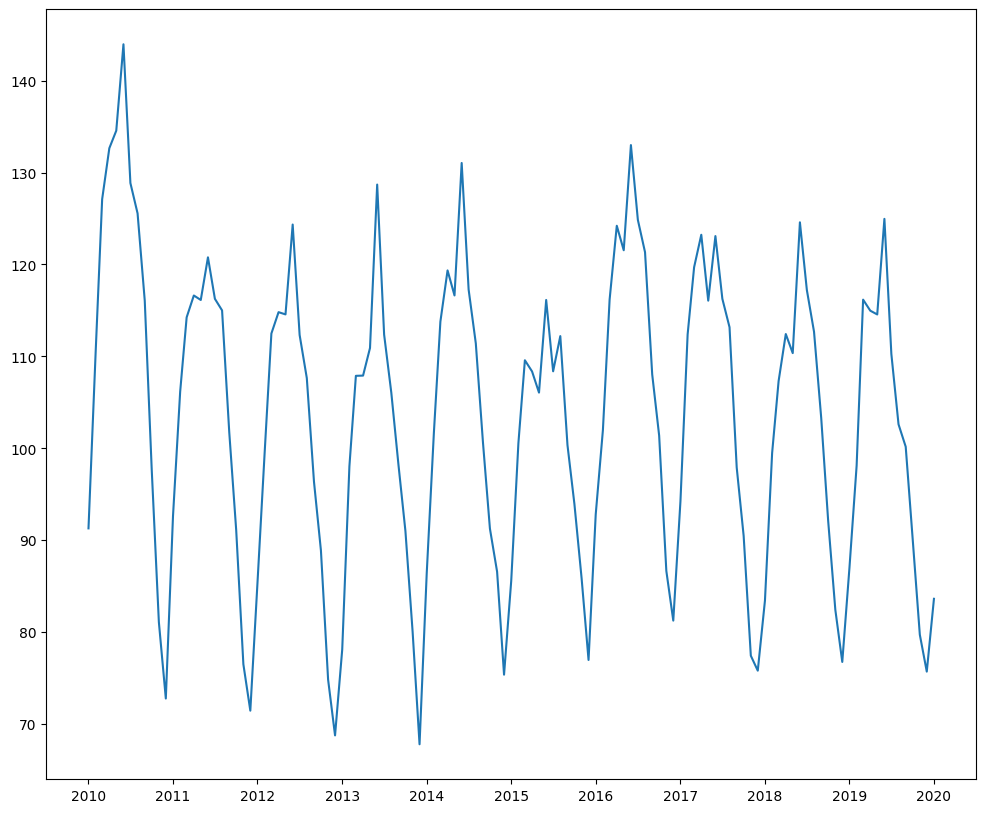

In [8]:
plt.figure(figsize=(12,10))
plt.plot(data)


In [9]:
train_end=datetime(2018,12,1)
test_end=datetime(2019,12,1)

train_data=data[:train_end]
test_data=data[train_end + timedelta(days=1):test_end]
train_data

DATE
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
                ...   
2018-08-01    112.6779
2018-09-01    103.3118
2018-10-01     92.1321
2018-11-01     82.4347
2018-12-01     76.7608
Freq: MS, Name: production, Length: 108, dtype: float64

In [10]:
model=ARIMA(train_data,order=(3,0,0))#0 and 0 are here in order since its an AR model so no moving average component and no differencing


In [11]:
start=time()
model_fit=model.fit()
end=time()
print("Model fitting time:",end-start)

Model fitting time: 0.06032109260559082


In [12]:
print(model_fit.summary())
#Lower the P, more the importance
#Sigma2 is the variance of the residuals.Residuals are the erorrs between predicted and actual.

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Fri, 26 Jul 2024   AIC                            758.170
Time:                        15:56:09   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.7

In [13]:
pred_startdate=test_data.index[0]
pred_enddate=test_data.index[-1]

In [14]:
test_data

DATE
2019-01-01     86.9988
2019-02-01     98.1116
2019-03-01    116.1718
2019-04-01    114.9703
2019-05-01    114.5613
2019-06-01    124.9605
2019-07-01    110.2632
2019-08-01    102.6085
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
Freq: MS, Name: production, dtype: float64

In [15]:
predictions=model_fit.predict(start=pred_startdate,end=pred_enddate)
residuals=test_data-predictions

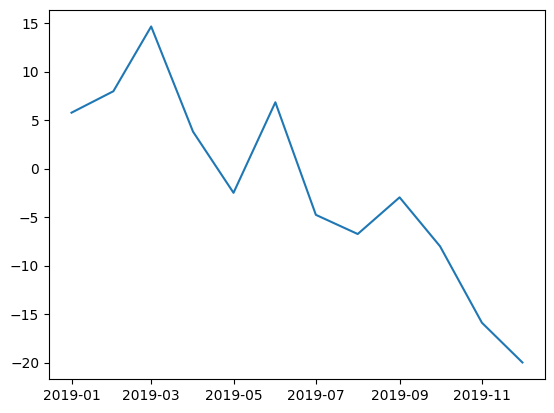

In [16]:
plt.plot(residuals)

Text(0.5, 1.0, 'Ice cream production')

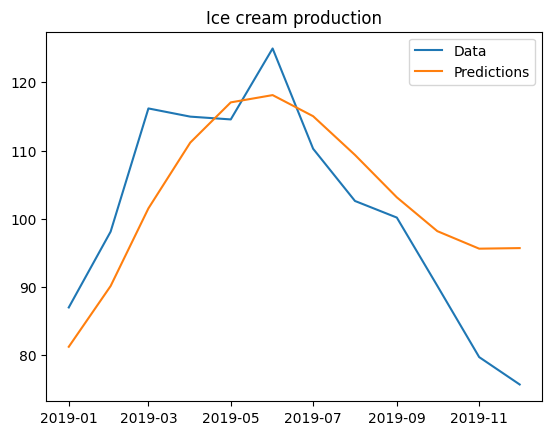

In [17]:
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data','Predictions'))
plt.title('Ice cream production')

In [18]:
model2=ARIMA(train_data,order=(8,0,0))#0 and 0 are here in order since its an AR model so no moving average component and no differencing


In [19]:
start=time()
model_fit=model2.fit()
end=time()
print("Model fitting time:",end-start)

Model fitting time: 0.42525601387023926


In [20]:
print(model_fit.summary())
#Lower the P, more the importance
#Sigma2 is the variance of the residuals.Residuals are the erorrs between predicted and actual.

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                 ARIMA(8, 0, 0)   Log Likelihood                -360.895
Date:                Fri, 26 Jul 2024   AIC                            741.790
Time:                        15:56:10   BIC                            768.611
Sample:                    01-01-2010   HQIC                           752.665
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5981      1.214     85.360      0.000     101.219     105.977
ar.L1          0.9785      0.100      9.824      0.000       0.783       1.174
ar.L2         -0.1553      0.146     -1.066      0.2

In [21]:
predictions=model_fit.predict(start=pred_startdate,end=pred_enddate)
residuals=test_data-predictions

Text(0.5, 1.0, 'Ice cream production')

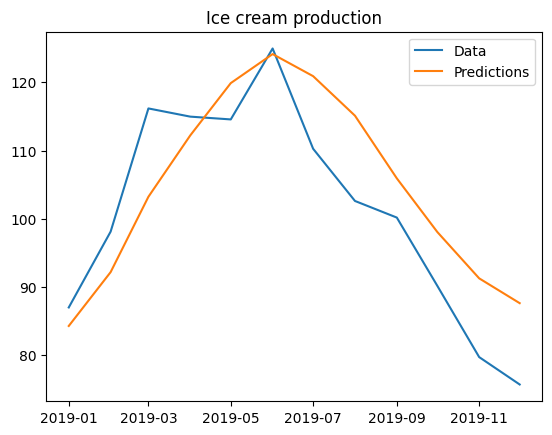

In [22]:
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data','Predictions'))
plt.title('Ice cream production')

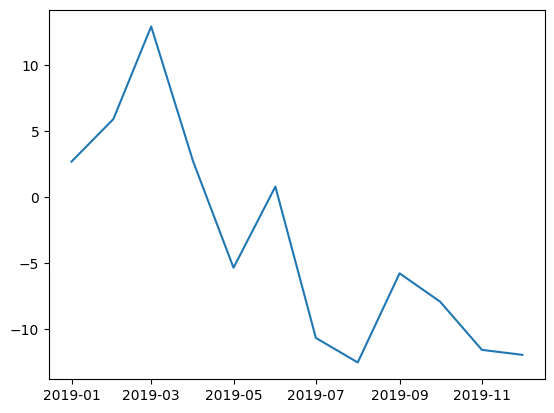

In [23]:
plt.plot(residuals)

In [24]:
train_end=datetime(2015,1,1)
test_end=datetime(2019,12,1)
x=datetime(2005,1,1)

data

DATE
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Freq: MS, Name: production, Length: 121, dtype: float64

In [25]:
newdata=pd.read_csv('ice_cream.csv',parse_dates=[0],index_col=0,date_parser=parser)

#parse_dates=[0] tells panda to parse the data in the first column(0th index) as dates
#date_parser=parser tells the parser that is to be used for parsing
#index_col=0: This makes the first column (date) the index of the DataFrame
#squeeze=True: This parameter is used to squeeze the DataFrame to a Series if the resultant DataFrame has only one column after-
#-filtering by index_col

if len(newdata.columns) == 1:
    newdata = newdata.squeeze()

newdata=newdata[x:]
newdata=newdata.asfreq(pd.infer_freq(newdata.index))


print(newdata)

DATE
2005-01-01    130.2719
2005-02-01    148.1976
2005-03-01    159.2750
2005-04-01    171.8314
2005-05-01    169.9522
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Freq: MS, Name: IPN31152N, Length: 181, dtype: float64


/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_35107/1857443914.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  newdata=pd.read_csv('ice_cream.csv',parse_dates=[0],index_col=0,date_parser=parser)


In [26]:
train2=newdata[:train_end]
test2=newdata[train_end + timedelta(days=1):test_end]

In [27]:
model=ARIMA(train2,order=(9,0,0))

start=time()
modelfit=model.fit()
end=time()

print('Training time:',end-start)

Training time: 0.5485382080078125


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
test2.index[0]

Timestamp('2015-02-01 00:00:00')

In [29]:
test2.index[-1]

Timestamp('2019-12-01 00:00:00')

In [30]:
predstart=test2.index[0]
predend=test2.index[-1]

In [31]:
model2=ARIMA(train2,order=(20,0,0))
start=time()
modelfit=model2.fit()
end=time()

print('Training time:',end-start)

Training time: 1.540477991104126


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
predictions=modelfit.predict(start=predstart,end=predend)
residuals=test2-predictions

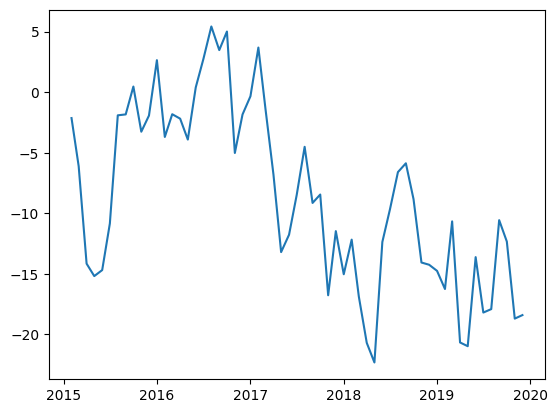

In [33]:
plt.plot(residuals)

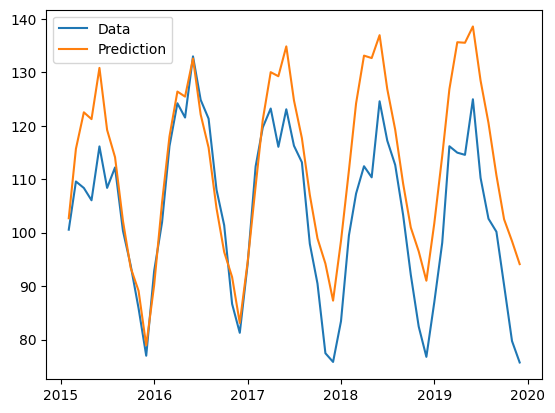

In [34]:
plt.plot(test2)
plt.plot(predictions)
plt.legend(('Data','Prediction'))

In [35]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              IPN31152N   No. Observations:                  121
Model:                ARIMA(20, 0, 0)   Log Likelihood                -369.474
Date:                Fri, 26 Jul 2024   AIC                            782.948
Time:                        15:56:12   BIC                            844.455
Sample:                    01-01-2005   HQIC                           807.928
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.0172     23.723      5.101      0.000      74.521     167.513
ar.L1          0.6115      0.112      5.474      0.000       0.393       0.830
ar.L2          0.0710      0.135      0.524      0.600      -0.194       0.336
ar.L3          0.1403      0.125      1.120      0.263      -0.105       0.386
ar.L4         -0.0529      0.131     -0.404      0.686      -0.309       0.203
ar.L5          0.2338      0.119      1.971      0.049       0.001       0.466
ar.L6         -0.1922      0.125     -1.539      0.124      -0.437       0.053
ar.L7         -0.0414      0.137     -0.303      0.762      -0.309       0.226
ar.L8          0.2149      0.112      1.918      0.055      -0.005       0.434
ar.L9         -0.0923      0.094     -0.982      0.326      -0.277       0.092
ar.L10        -0.0242      0.086     -0.281      0.779      -0.193       0.145
ar.L11         0.1558      0.092      1.693      0.090      -0.025       0.336
ar.L12         0.7461      0.079      9.415      0.000       0.591       0.901
ar.L13        -0.5227      0.134     -3.909      0.000      -0.785      -0.261
ar.L14         0.0519      0.166      0.312      0.755      -0.274       0.378
ar.L15        -0.2338      0.113     -2.076      0.038      -0.455      -0.013
ar.L16        -0.0263      0.138     -0.190      0.849      -0.298       0.245
ar.L17        -0.0768      0.120     -0.642      0.521      -0.311       0.158
ar.L18         0.0547      0.132      0.415      0.678      -0.204       0.313
ar.L19         0.0483      0.158      0.305      0.760      -0.262       0.359
ar.L20        -0.0880      0.107     -0.822      0.411      -0.298       0.122
sigma2        21.9282      3.585      6.116      0.000      14.901      28.956
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.95   Prob(JB):                         0.77
Heteroskedasticity (H):               0.44   Skew:                             0.14
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SyntaxError: incomplete input (412514953.py, line 9)